In [1]:
# !pip install mplsoccer
# !pip install statsbombpy

In [2]:
from mplsoccer.pitch import Pitch
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from statsbombpy import sb
import pandas as pd
import numpy as np
import warnings
import ast
import os
import sys
import json
from pandas.errors import SettingWithCopyWarning
from statsbombpy.api_client import NoAuthWarning

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=NoAuthWarning)

In [3]:
parent_dir = os.path.abspath(os.path.join(os.path.dirname("./"), '..'))
sys.path.append(parent_dir)
from tools.draw_pitch_plot import Draw_Pitch_Actions

In [4]:
master_events_df = pd.read_csv("data/Bayer Leverkusen Bundesliga 23-24 Statsbomb Events Data.csv", low_memory=False)
commoncols = master_events_df.columns.tolist()

In [5]:
from IPython.display import display, HTML
loading_bar_html = """
<div id="progress-container" style="width: 50%; border: 1px solid #ccc; margin: 20px 0;">
  <div id="progress-bar" style="width: 0%; height: 20px; background-color: #4CAF50; text-align: center; line-height: 20px; color: white;"></div>
</div>
<script>
function updateProgressBar(progress) {
  var progressBar = document.getElementById('progress-bar');
  progressBar.style.width = progress + '%';
  progressBar.innerHTML = progress + '%';
}
</script>
"""

In [6]:
with open('data/comps.json', 'r') as f:
    comps = json.load(f)

In [7]:
comps_ids = []
for c in comps:
    if c["competition_gender"]=="male":
        comps_ids.append(c)

In [8]:
len(comps_ids)

67

In [9]:
comps_ids

[{'competition_id': 9,
  'season_id': 281,
  'country_name': 'Germany',
  'competition_name': '1. Bundesliga',
  'competition_gender': 'male',
  'competition_youth': False,
  'competition_international': False,
  'season_name': '2023/2024',
  'match_updated': '2024-07-15T14:15:54.671676',
  'match_updated_360': '2024-07-15T14:17:00.877356',
  'match_available_360': '2024-07-15T14:17:00.877356',
  'match_available': '2024-07-15T14:15:54.671676'},
 {'competition_id': 9,
  'season_id': 27,
  'country_name': 'Germany',
  'competition_name': '1. Bundesliga',
  'competition_gender': 'male',
  'competition_youth': False,
  'competition_international': False,
  'season_name': '2015/2016',
  'match_updated': '2024-05-19T11:11:14.192381',
  'match_updated_360': None,
  'match_available_360': None,
  'match_available': '2024-05-19T11:11:14.192381'},
 {'competition_id': 1267,
  'season_id': 107,
  'country_name': 'Africa',
  'competition_name': 'African Cup of Nations',
  'competition_gender': 'ma

<br><br><br><br>
# Importing Datasets from Statsbomb🫷

In [10]:
# all_matches = []
# all_events = []

# def process_competition(competition_id, season_id):
#     global all_matches, all_events
#     matches = sb.matches(competition_id=competition_id, season_id=season_id)
#     all_matches.append(matches)
#     matches_ids = matches["match_id"]
#     match_number = len(matches_ids)
    
#     display(HTML(loading_bar_html))  # Display the loading bar
    
#     for process, match_id in enumerate(matches_ids):
#         events = sb.events(match_id=match_id)
#         all_events.append(events)
#         progress = int((process + 1) / match_number * 100)
#         display(HTML(f"<script>updateProgressBar({progress})</script>"))  # Update loading bar

#     print(f"Competition {competition_id}, Season {season_id} __completed__!")

# for c in comps_ids:
#     competition_id = c["competition_id"] 
#     season_id = c["season_id"]
#     process_competition(competition_id, season_id)

# all_matches = pd.concat(all_matches, ignore_index=True)
# all_events = pd.concat(all_events, ignore_index=True)

# all_matches.to_csv(f"data/all_matches.csv", index=False)
# all_events.to_csv(f"data/all_events.csv", index=False)

<br><br><br><br>
# Hands-On Statsbomb💎

In [11]:
def load(file_id):
    df = pd.read_csv(f"data/all-events/split_part_{file_id}.csv", low_memory=False)[commoncols]
    return df

In [12]:
def coordinator(df):
    def safe_literal_eval(val):
        try:
            return ast.literal_eval(val) if isinstance(val, str) and val != '[]' else []
        except (ValueError, SyntaxError):
            return []
    
    df['location'] = df['location'].fillna('[]')
    df['location'] = df['location'].apply(safe_literal_eval)
    df['y_yards'] = df['location'].apply(lambda loc: loc[0] if loc else None)
    df['x_yards'] = df['location'].apply(lambda loc: loc[1] if loc else None)
    df["y"] = df["y_yards"].fillna(0).apply(lambda y: min(24, int(y * 24 / 120)))  
    df["x"] = df["x_yards"].fillna(0).apply(lambda x: min(16, int(x * 16 / 80)))
    return df

In [13]:
events_df_1 = load(1)

In [14]:
matches_df = pd.read_csv(f"data/all-events/all_matches.csv", low_memory=False)

In [122]:
df = pd.merge(events_df_1, matches_df, on="match_id", how="inner")
df = coordinator(df)

<br><br><br><br><br><br><br><br>
# Data Cleaning & Transformation

In [204]:
df.type.value_counts()

type
Pass                 287816
Ball Receipt*        276298
Carry                214771
Pressure              99817
Ball Recovery         29916
Duel                  23623
Clearance             13214
Block                 11950
Goal Keeper            8975
Foul Committed         8906
Dribble                8599
Miscontrol             8575
Foul Won               8550
Shot                   7448
Dispossessed           7183
Interception           5832
Dribbled Past          5231
Substitution           1751
50/50                  1468
Half Start             1160
Half End               1156
Injury Stoppage         997
Tactical Shift          936
Starting XI             580
Shield                  428
Referee Ball-Drop       315
Player Off              281
Player On               281
Bad Behaviour           208
Offside                 118
Error                   111
Own Goal For             28
Own Goal Against         28
Name: count, dtype: int64

In [124]:
df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Dribble', 'Duel', 'Interception',
       'Ball Recovery', 'Dispossessed', 'Block', 'Foul Committed',
       'Foul Won', 'Error', 'Shot', 'Goal Keeper', 'Injury Stoppage',
       'Referee Ball-Drop', '50/50', 'Clearance', 'Offside',
       'Dribbled Past', 'Player Off', 'Player On', 'Half End',
       'Substitution', 'Bad Behaviour', 'Tactical Shift', 'Shield',
       'Own Goal For', 'Own Goal Against'], dtype=object)

In [123]:
# pass_outcome
df.loc[df['type'] == "Pass", 'pass_outcome'] = df.loc[df['type'] == "Pass", 'pass_outcome'].fillna("Success")

In [125]:
# ball_receipt_outcome
df.loc[df['type'] == "Ball Receipt*", 'ball_receipt_outcome'] = df.loc[df['type'] == "Ball Receipt*", 'ball_receipt_outcome'] \
.fillna("Success")

In [133]:
# dribble_outcome
df.loc[df['type'] == "Dribble", 'dribble_outcome'] = df.loc[df['type'] == "Dribble", 'dribble_outcome'].fillna("Success")
df.loc[df['type'] == "Dribble", 'dribble_outcome'] = df.loc[df['type'] == "Dribble", 'dribble_outcome'].replace(['Complete'], 'Success')

In [151]:
# duel_outcome
# df.loc[(df['type'] == "Duel") & (df['duel_type'] == "Tackle"), "duel_outcome"].value_counts()

In [163]:
# interception_outcome
# df.loc[df['type'] == "Interception", "interception_outcome"].value_counts()

In [183]:
# shot_outcome
df.loc[df['type'] == "Shot", 'shot_outcome'] = df.loc[df['type'] == "Shot", 'shot_outcome'].fillna("Success")
df.loc[df['type'] == "Shot", 'shot_outcome'] = df.loc[df['type'] == "Shot", 'shot_outcome'] \
.replace(['Saved to Post', 'Saved Off Target', 'Wayward' , 'Post'], 'Off T')

In [189]:
# goalkeeper_outcome
# df.loc[df['type'] == "Goal Keeper", 'goalkeeper_outcome'] = df.loc[df['type'] == "Goal Keeper", 'goalkeeper_outcome']

In [205]:
# 50/50
# df.query("type == '50/50'")["50_50"].value_counts()

In [227]:
df.iloc[59578].to_dict()#.value_counts()

{'50_50': nan,
 'bad_behaviour_card': nan,
 'ball_receipt_outcome': nan,
 'ball_recovery_recovery_failure': nan,
 'block_deflection': nan,
 'block_save_block': nan,
 'carry_end_location': nan,
 'clearance_aerial_won': nan,
 'clearance_body_part': nan,
 'clearance_head': nan,
 'clearance_left_foot': nan,
 'clearance_right_foot': nan,
 'counterpress': nan,
 'dribble_nutmeg': nan,
 'dribble_outcome': nan,
 'duel_outcome': nan,
 'duel_type': nan,
 'duration': 0.729893,
 'foul_committed_advantage': nan,
 'foul_committed_card': nan,
 'foul_committed_penalty': nan,
 'foul_won_advantage': nan,
 'foul_won_defensive': nan,
 'foul_won_penalty': nan,
 'goalkeeper_body_part': nan,
 'goalkeeper_end_location': nan,
 'goalkeeper_outcome': nan,
 'goalkeeper_position': nan,
 'goalkeeper_technique': nan,
 'goalkeeper_type': nan,
 'id': '260d69eb-bbe8-47f8-971f-ed9b89711ae7',
 'index': 4005,
 'injury_stoppage_in_chain': nan,
 'interception_outcome': nan,
 'location': [110.9, 39.9],
 'match_id': 3895074,
 

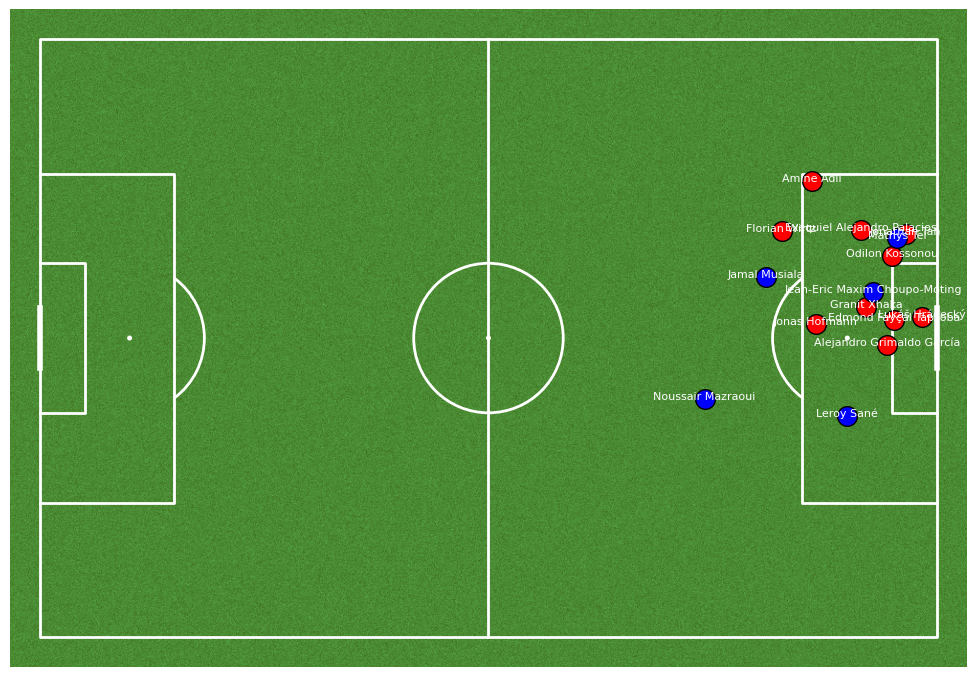

In [226]:
# Fix JSON formatting by replacing single quotes with double quotes
raw_json = df.iloc[59578].shot_freeze_frame
fixed_json = raw_json.replace("'", '"').replace("False", "false").replace("True", "true")  # Correcting boolean values too

# Load JSON
freeze_frame_data = json.loads(fixed_json)

# Initialize the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))  # Set figure size here

# Plot players
for player in freeze_frame_data:
    x, y = player['location']
    name = player['player']['name']
    teammate = player['teammate']

    # Use different markers or colors for teammates and opponents
    color = 'blue' if teammate else 'red'
    pitch.scatter(x, y, color=color, ax=ax, s=200, edgecolors='black')
    pitch.annotate(name, (x, y), ax=ax, fontsize=8, color='white', ha='center')

# Show plot
plt.show()

<br><br><br><br><br><br><br><br>
# Column Stats

In [109]:
# events_df_1.columns.tolist()

In [18]:
import json

ignore_columns = ['location', 'id', 'player', 'team', 'angle', 'length', 'recipient', 'frame', 'xg']
ignored_columns = df.columns[df.columns.str.contains('|'.join(ignore_columns))]

# Create a dictionary to store the results
results = {}

# Copy the dataframe
events_df = df.copy()

# Remove the ignored columns
events_df = events_df.loc[:, ~events_df.columns.isin(ignored_columns)]

# Define actions to check
actions = [
    "ball_receipt",
    "ball_recovery",
    "block",
    "carry",
    "clearance",
    "dribble",
    "duel",
    "foul",
    "goalkeeper",
    "interception",
    "pass",
    "shot",
    "50_50",
    "counterpress",
    "miscontrol",
]

# Action-Based Columns Stats
action_stats = {}
for action in actions:
    relevant_columns = events_df[events_df.columns[events_df.columns.str.startswith(action)]].columns
    action_stats[action] = {}
    for col in relevant_columns:
        # Count valid (non-null) rows for each column
        valid_count = events_df[col].notna().sum()
        value_counts = events_df[col].value_counts().to_dict()
        action_stats[action][col] = {
            "valid_rows": int(valid_count),  # Convert to standard Python int
            "value_counts": value_counts
        }

results["Action-Based Columns Stats"] = action_stats

# Save the results to a JSON file
with open("data/all-events/event_stats.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

In [19]:
df[df.columns[df.columns.str.startswith("ball_receipt")]].iloc[:, 0].unique()

array([nan, 'Incomplete'], dtype=object)

<br><br><br><br><br><br><br><br>
# Bayern Münich v. Bayer Leverkusen - Events

In [93]:
the_id = 3895074
the_team = "Bayern Munich"

events_df = df.query(f"match_id == {the_id} and period == 2 and team != '2{the_team}'").sort_values("timestamp")
events_df["timer"] = events_df["minute"].astype(str) + ":" + events_df["second"].astype(str)

In [220]:
events_df[["timer","type","player"]][1791:][:50]

,timer,type,player
56651,85:4,Pass,Mathys Tel
57851,85:6,Ball Receipt*,Jamal Musiala
58898,85:6,Carry,Jamal Musiala
59752,85:12,Dispossessed,Jamal Musiala
59433,85:12,Duel,Exequiel Alejandro Palacios
56652,85:14,Pass,Matthijs de Ligt
57852,85:15,Ball Receipt*,Mathys Tel
58899,85:15,Carry,Mathys Tel
59269,85:18,Pressure,Odilon Kossonou
59684,85:18,Dribbled Past,Odilon Kossonou


In [114]:
df.pass_outcome.value_counts(dropna=True)

pass_outcome
Successful          222224
Incomplete           56452
Out                   5279
Unknown               2142
Pass Offside          1255
Injury Clearance       464
Name: count, dtype: int64

In [76]:
events_df.type.unique()

array(['Half Start', 'Pass', 'Carry', 'Ball Receipt*', 'Block',
       'Clearance', 'Ball Recovery', 'Dispossessed', 'Pressure',
       'Interception', 'Foul Won', 'Dribbled Past', 'Duel', 'Dribble',
       'Goal Keeper', 'Shot', 'Miscontrol', 'Foul Committed',
       'Substitution', 'Tactical Shift', 'Half End'], dtype=object)

In [80]:
filtered_df = events_df[events_df['type'].isin(['Pass', 'Carry', 'Ball Receipt*', 'Block',
                                               'Clearance', 'Ball Recovery', 'Dispossessed', 'Pressure',
                                               'Interception', 'Foul Won', 'Dribbled Past', 'Duel', 'Dribble',
                                               'Goal Keeper', 'Shot', 'Miscontrol', 'Foul Committed'])]

In [85]:
actions_sequence = filtered_df.type.tolist()

action_mapping = {action: idx for idx, action in enumerate(set(actions_sequence))}
actions_numeric = [action_mapping[action] for action in actions_sequence]

num_actions = len(action_mapping)
transition_counts = np.zeros((num_actions, num_actions), dtype=int)

# Eylemler arasındaki geçişleri sayma
for (current, next_) in zip(actions_numeric, actions_numeric[1:]):
    transition_counts[current, next_] += 1

# Geçiş olasılıklarını hesaplama
transition_matrix = np.zeros_like(transition_counts, dtype=float)
for i in range(num_actions):
    row_sum = np.sum(transition_counts[i])
    if row_sum > 0:
        transition_matrix[i] = transition_counts[i] / row_sum

transition_df = pd.DataFrame(transition_matrix, index=action_mapping.keys(), columns=action_mapping.keys())
transition_df
# transition_df.to_csv('transition_matrix.csv')

,Pressure,Foul Committed,Ball Recovery,Clearance,Dispossessed,Dribble,Duel,Shot,Ball Receipt*,Miscontrol,Foul Won,Pass,Interception,Block,Carry,Dribbled Past,Goal Keeper
Pressure,0.440000,0.030000,0.060000,0.000000,0.000000,0.000000,0.060000,0.000000,0.020000,0.000000,0.000000,0.100000,0.040000,0.070000,0.090000,0.07,0.020000
Foul Committed,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.20,0.200000
Ball Recovery,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.076923,0.038462,0.384615,0.000000,0.000000,0.461538,0.00,0.000000
Clearance,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.400000,0.00,0.000000
Dispossessed,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.00,0.000000
Dribble,0.375000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.375000,0.00,0.000000
Duel,0.133333,0.000000,0.200000,0.000000,0.066667,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.400000,0.000000,0.000000,0.066667,0.00,0.000000
Shot,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.00,0.000000
Ball Receipt*,0.057915,0.000000,0.000000,0.003861,0.003861,0.007722,0.011583,0.007722,0.011583,0.011583,0.015444,0.405405,0.000000,0.011583,0.447876,0.00,0.003861
Miscontrol,0.500000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.00,0.000000
